# Игры — Анализ рекламных источников

## Материалы:
* [Презентация](https://disk.yandex.ru/i/I6VTmfAalAlWMA)
* [Дашборд](https://public.tableau.com/app/profile/liza1994/viz/_16666485897100/Dashboard1?publish=yes)


## Ведение

Для каждой игры важны её игроки, поэтому анализ их действий один из важнейших способов понять поведение игроков. С помощью анализа мы сможем улучшить игру, сделать ее более интересной и дружелюбной. Наша мобильная игра - *«Космические братья»* и в ней игроки стараются колонизировать галактику и реализовать космический программы. 
<br>
<br> Так же темами данного анализа являются расходы на рекламу, привлечение игроков и скорая монетизация - показ рекламы на экране перед определенными действиями. Все это мы постараемся проанализировать, составить выводы, найти решения и бежать улучшать игру.  
  
  
Итак, наши **задачи**:  
1) Изучить поведение игроков;  
2) Проанализировать влияние источника перехода в игру на поведение пользователя;  
3) Проверьте статистические гипотезы:
  - Проверьте гипотезу: время завершения уровня различается в зависимости способа прохождения: 
    - через реализацию проекта,
    - через победу над другим игроком.
  - Количество построенных объектов в среднем одинаково у всех игроков, вне зависимости от способа прохождения первого уровня:
    - через реализацию проекта,
    - через победу над другим игроком.

## Предобработка данных

In [ ]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats as st
#from scipy.stats import wilcoxon
pd.options.display.float_format = '{: .2f}'.format

### Изучение информации о предоставленной информации

В нашем распоряжении три датасета. Изучим их подробнее.

In [ ]:
#функция для вывода первичной информации о датасете
def firstinfo(df):
    display(df.head(5))
    df.info()
    return

**Изучение датафрейма `game_actions`**

Датасет *game_actions* содержит:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

In [ ]:
game_actions = pd.read_csv('/datasets/game_actions.csv')
firstinfo(game_actions)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


В датафрейме всего 135 640 строк. В столбцах `building_type` и `project_type` есть пропуски. Столбец в котором содержится дата имеет тип данных *object*, это нужно исправить.

In [ ]:
game_actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [ ]:
game_actions['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

In [ ]:
game_actions['project_type'].unique()

array([nan, 'satellite_orbital_assembly'], dtype=object)

In [ ]:
game_actions[game_actions.duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


Ошибок в уникальных значениях столбцов нет, как и не явных дублей, а вот явные дубли в строках мы нашли, целую одну.

**Изучение датафрейма `ad_costs`**

Датасет *ad_costs* содержит:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

In [ ]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
firstinfo(ad_costs) 

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [ ]:
ad_costs['source'].unique()

array(['facebook_ads', 'instagram_new_adverts', 'yandex_direct',
       'youtube_channel_reklama'], dtype=object)

У нас 4 рекламных ресурса и всего 28 строк в датасете. В столбце с датой так же тип данных *object*.

In [ ]:
ad_costs[ad_costs.duplicated()].count()

source    0
day       0
cost      0
dtype: int64

Дублей нет, как и `nan`-значений.

**Изучение датафрейма `user_source`**

Датасет *user_source* содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение.

In [ ]:
user_source = pd.read_csv('/datasets/user_source.csv')
firstinfo(user_source)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [ ]:
user_source['source'].unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

In [ ]:
user_source[user_source.duplicated()].count()

user_id    0
source     0
dtype: int64

Всего у нас 13 576 уникальных *id* пользователей, как и строк в данной таблице. Ресурсы-перехода соотносятся с таблицей `ad_costs` и их 4. Дублей и значений `nan` не обнаружено.

### Подготовка данных к анализу

Устраним неполадки, которые нашли в датафреймах.

In [ ]:
#Удалим дубликат
game_actions = game_actions.drop_duplicates().reset_index(drop=True)

In [ ]:
#меняем типы данных с датами в game_actions и ad_costs
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])
ad_costs['day'] = pd.to_datetime(ad_costs['day'])


Значения `nan` в таблице game_actions не являются случайно пропущенными значениями, ошибками или т.п. Они рассказывают нам о специфике игры. 

In [ ]:
act1 = game_actions[game_actions['building_type'].isnull()]
act1['event'].unique()

array(['finished_stage_1', 'project'], dtype=object)

Например, если мы в столбце `building_type` выберем только значения `nan`  и посмотрим уникальные значения столбца `event`, это расскажет нам о том, что ни один тип здания не был построен, а случился переход с 1го уровня или же выполнен проект. <br> Такая же ситуация со столбцом `project_type`, там указаны только названия проектов, а все действия игроков, направленные не на осуществления проекта, оказались `nan`.

In [ ]:
display(len(game_actions[game_actions['project_type'] == 'satellite_orbital_assembly']))

display(len(game_actions[game_actions['event']=='project']))


1866

1866

Мы подготовили данные для дальнейшего их анализа. Каких-то особых замечаний выявлено не было. Пропуски вполне логичные, а дубль всего один.

## Исследовательский анализ данных

### Анализ поведения игроков

Приступим к анализу. Вначале соединим датафреймы `game_actions` и`user_source`

In [ ]:
df = game_actions.merge(user_source, on='user_id', how='left')

firstinfo(df)

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct


<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135638
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
 5   source          135639 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 7.2+ MB


Добавим информацию о стратегии игры к игрокам, которые закончили первый уровень.  
Обычно стратегии две: `PvE` - *player versus environment (игрок против окружающей среды)* и `PvP` - *player versus player (игрок против игрока)* .  
В нашем случае, те кто выполнил проект и перешел с 1го уровня - PvE, а те кто перешел с первого уровня, но проект не завершали, прошли уровень с помощью победы над противником.

In [ ]:
#создание таблицы с категориями

progect = df.loc[df['project_type'] == 'satellite_orbital_assembly']
progect['gamer'] = 'PvE'
progect = progect[['user_id', 'gamer']]

catecory = pd.merge(progect, df.loc[df['event'] == 'finished_stage_1'], on = 'user_id', how='right')
catecory['gamer'] = catecory['gamer'].fillna('PvP')
catecory = catecory[['user_id', 'gamer']]
catecory

/tmp/ipykernel_104/4261493680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  progect['gamer'] = 'PvE'


,user_id,gamer
0,ced7b368-818f-48f6-9461-2346de0892c5,PvP
1,7ef7fc89-2779-46ea-b328-9e5035b83af5,PvP
2,70db22b3-c2f4-43bc-94ea-51c8d2904a29,PvP
3,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,PvP
4,58e077ba-feb1-4556-a5a0-d96bd04efa39,PvP
...,...,...
5812,22cce310-fe10-41a2-941b-9c3d63327fea,PvP
5813,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,PvE
5814,515c1952-99aa-4bca-a7ea-d0449eb5385a,PvP
5815,32572adb-900f-4b5d-a453-1eb1e6d88d8b,PvP


Всего прошли 1й уровень 5 817 игроков.<br><br> Разделим виды построек в игре на отдельные столбцы, так же поступим с типом игроков предварительно объединив их с основной таблицей.

In [ ]:
#Группировка и объединение таблиц
table_merg = (df.pivot
              (columns='event', values='event', 
               index = ('event_datetime','building_type','user_id','project_type','source'))
              .reset_index()
                  .pivot(columns='building_type', values='building_type', 
                  index = ('event_datetime','user_id','project_type','source','building','finished_stage_1','project'))
                  .reset_index())
#table_merg = (table_merg.pivot
              #(columns='building_type', values='building_type', 
               #index = ('event_datetime','user_id','project_type','source','building','finished_stage_1','project'))
              #.reset_index())
            
#Группируем полученную таблицу по user_id
group_event = table_merg.groupby('user_id').agg({'building': 'count',
                           'finished_stage_1': 'count',
                           'project': 'count',
                           'assembly_shop': 'count',
                           'research_center': 'count',
                           'spaceport': 'count',
                          })
#присоединяем таблицу с категорями
group_event = group_event.merge(catecory, on='user_id', how='left')
group_event['temporary'] = group_event['gamer']
#Создание сводной таблицы для расщепления столбца со стилем игры
group_event = (group_event.pivot
               (columns='temporary', values='temporary', 
                index = ('user_id','building','finished_stage_1','project','assembly_shop','research_center','spaceport','gamer'))
               .reset_index()).filter(regex='(?i)^(?!NaN).+', axis=1)

group_event

temporary,user_id,building,finished_stage_1,project,assembly_shop,research_center,spaceport,gamer,PvE,PvP
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0,0,6,1,6,NaN,NaN,NaN
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0,0,4,0,5,NaN,NaN,NaN
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0,0,2,0,2,NaN,NaN,NaN
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,4,0,4,PvP,NaN,PvP
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0,0,3,1,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,9,1,0,7,1,1,PvP,NaN,PvP
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,16,0,0,5,3,8,NaN,NaN,NaN
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,9,1,0,4,2,3,PvP,NaN,PvP
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,7,0,0,6,0,1,NaN,NaN,NaN


Создадим таблицу с информацией о первом и последнем игровом дне для всех игроков.

In [ ]:
time_in_game =  table_merg.groupby('user_id').agg({'event_datetime':['min','max'],                                                        
                                                        'source': 'min'}).reset_index()
time_in_game.columns = ['user_id', 'min_date','max_date','source']        

time_in_game['day_market'] = pd.to_datetime(time_in_game['min_date']).dt.date
time_in_game['day_market'] = pd.to_datetime(time_in_game['day_market'])
time_in_game

,user_id,min_date,max_date,source,day_market
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,facebook_ads,2020-05-06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,yandex_direct,2020-05-06
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,youtube_channel_reklama,2020-05-05
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,instagram_new_adverts,2020-05-05
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,facebook_ads,2020-05-05
...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,instagram_new_adverts,2020-05-04
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,2020-05-14 10:11:36,facebook_ads,2020-05-04
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,2020-05-12 13:01:52,yandex_direct,2020-05-04
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,2020-05-11 22:04:30,instagram_new_adverts,2020-05-04


Для того что бы объединить полученную таблицу с датафреймом `ad_costs`, проверим дни рекламной кампании в датафреймах.

In [ ]:
display('Дата первого дня рекламной кампании:',ad_costs['day'].min())
display('Дата последнего дня рекламной кампании:',ad_costs['day'].max())

'Дата первого дня рекламной кампании:'

Timestamp('2020-05-03 00:00:00')

'Дата последнего дня рекламной кампании:'

Timestamp('2020-05-09 00:00:00')

In [ ]:
display('Дата первого дня рекламной кампании:',time_in_game['day_market'].min())
display('Дата последнего дня рекламной кампании:',time_in_game['day_market'].max())

'Дата первого дня рекламной кампании:'

Timestamp('2020-05-04 00:00:00')

'Дата последнего дня рекламной кампании:'

Timestamp('2020-05-10 00:00:00')

Дата начала рекламной акции отличается от даты первого перехода в игру ровно на 1 день. Это возможно из-за того, например, что рекламная акция была согласована *03.05.2020*, а её фактический запуск состоялся *04.05.2020*.
<br> Добавим 1 день в таблице `ad_costs`, что бы объединить таблицы и создать единую таблицу

In [ ]:
ad_costs['day_market'] = ad_costs['day'] + pd.DateOffset(days=1)
#time_in_game = time_in_game.merge(ad_costs,  how='outer', on=['source','day_market'])
new_df = pd.merge(group_event, time_in_game
                  .merge(ad_costs,  how='outer', on=['source','day_market']),  how='outer', on=['user_id'])
new_df['gamer'] = new_df['gamer'].fillna('no_strategy')
new_df.head(5)

,user_id,building,finished_stage_1,project,assembly_shop,research_center,spaceport,gamer,PvE,PvP,min_date,max_date,source,day_market,day,cost
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0,0,6,1,6,no_strategy,NaN,NaN,2020-05-06 01:07:37,2020-05-20 11:26:06,facebook_ads,2020-05-06,2020-05-05,260.19
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0,0,4,0,5,no_strategy,NaN,NaN,2020-05-06 03:09:12,2020-05-18 10:46:52,yandex_direct,2020-05-06,2020-05-05,308.23
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0,0,2,0,2,no_strategy,NaN,NaN,2020-05-05 18:08:52,2020-05-14 09:21:27,youtube_channel_reklama,2020-05-05,2020-05-04,259.07
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,4,0,4,PvP,NaN,PvP,2020-05-05 21:02:05,2020-05-12 07:40:47,instagram_new_adverts,2020-05-05,2020-05-04,502.93
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0,0,3,1,8,no_strategy,NaN,NaN,2020-05-05 13:49:58,2020-05-22 02:46:45,facebook_ads,2020-05-05,2020-05-04,548.35


Объединим таблицы df и new_df что бы получить информацию по каждому действию.

In [ ]:
join = df.merge(new_df,  how='left', on=['user_id'])
join['data_event'] = pd.to_datetime(join['event_datetime']).dt.date
join['data_event'] = pd.to_datetime(join['data_event'])
join['event_week']  = join['data_event'].dt.isocalendar().week
join['event_year'] = join['data_event'].dt.year
join.head(5)

,event_datetime,event,building_type,user_id,project_type,source_x,building,finished_stage_1,project,assembly_shop,...,PvP,min_date,max_date,source_y,day_market,day,cost,data_event,event_week,event_year
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,7,0,0,7,...,NaN,2020-05-04 00:00:01,2020-05-10 20:27:01,youtube_channel_reklama,2020-05-04,2020-05-03,454.22,2020-05-04,19,2020
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads,11,1,1,6,...,NaN,2020-05-04 00:00:03,2020-05-15 05:29:13,facebook_ads,2020-05-04,2020-05-03,935.88,2020-05-04,19,2020
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts,12,1,0,6,...,PvP,2020-05-04 00:00:16,2020-05-16 11:51:58,instagram_new_adverts,2020-05-04,2020-05-03,943.20,2020-05-04,19,2020
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,facebook_ads,10,0,0,5,...,NaN,2020-05-04 00:00:16,2020-05-12 04:29:54,facebook_ads,2020-05-04,2020-05-03,935.88,2020-05-04,19,2020
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct,6,1,0,3,...,PvP,2020-05-04 00:00:35,2020-05-11 14:18:05,yandex_direct,2020-05-04,2020-05-03,969.14,2020-05-04,19,2020


Проанализируем полученные нами таблицы. Для этого создадим функцию, которая выведет нам необходимую информацию по действиям игроков.

In [ ]:
def get_retention(df, df2):
    #подсчет лайфтайма каждого действия
    df['data_event'] = pd.to_datetime(df['event_datetime']).dt.date
    df['data_event'] = pd.to_datetime(df['data_event'])
    df['event_lifetime'] = df['data_event'] - df['day_market']
  

    #join
    result_grouped = df.pivot_table(
    index='day_market', columns='event_lifetime',values = 'user_id', aggfunc='nunique')

    cohort_sizes = (
        df.groupby('day_market')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    
    
    # объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on='day_market', how='left'
    ).fillna(0)

    
    # делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(
        result_grouped['cohort_size'], axis=0
    ).drop(columns=['cohort_size'])
    result_grouped.index = result_grouped.index.strftime("%Y-%m-%d")
    result_grouped.columns = result_grouped.columns.astype(str)
    result_grouped.columns = result_grouped.columns.str.replace(' 00:00:00', '')
    
    
    # Метрики
    dau_total = (
        df.groupby('data_event').agg({'user_id': 'nunique'}).mean()
    )
    wau_total = (
        df.groupby(['event_year', 'event_week'])
        .agg({'user_id': 'nunique'})
        .mean()
    )
    sticky_factor = round((dau_total / wau_total * 100),2)
    
    
    #вывод информации об игроках
    print('\033[1m' + 'Информация о Количестве игроков' + '\033[0m')
    print()
    print('Количество уникальных игроков: ', df2['finished_stage_1'].count())
    print('Количество игроков завершивших 1й уровень: ', df2['finished_stage_1'].sum(),
          ', это около', round(df2['finished_stage_1'].sum()/df2['finished_stage_1'].count()*100,1), '% от общего количества игроков')
    print('Количество PvE игроков: ', df2['PvE'].count())
    print('Количество PvP игроков: ', df2['PvP'].count())
    print()
    
    
    #График 1
    gamer = df2.groupby('gamer').agg({'user_id':'count'}).reset_index().rename(columns={'user_id':'count'})
    plt.figure(figsize=(5,5))
    plt.pie(gamer['count'], autopct='%.1f%%', textprops={'fontsize': 10})
    plt.title('      Cоотношение стратегий игроков        ',
                fontstyle = 'oblique',
                fontsize = 12)
    plt.legend(labels=gamer['gamer'], bbox_to_anchor=(1.5, 0.9), prop={'size': 12})
    plt.show()
    
    
    #Информация о построенных зданиях
    print('\033[1m' + 'Информация о Количестве построенных зданий' + '\033[0m')
    print()
    print('Количество построенных зданий: ', round(df2['building'].sum(),2))
    
    
    #график 2
    bild = df.groupby(['building_type']).agg({'building_type':'count'}).rename(columns={'building_type':'count'})
    plt.figure(figsize=(5,5))
    plt.pie(bild['count'], autopct='%.1f%%', textprops={'fontsize': 12})
    plt.title('      Типы построенных объектов игроками     ',
                fontstyle = 'oblique',
                fontsize = 12)
    plt.legend(labels=bild.index, bbox_to_anchor=(1.5, 0.9), prop={'size': 12})
    plt.show()
    print('Количество построенных "assembly_shop": ', round(df2['assembly_shop'].sum(),2), 
          ',\n из них "PvE" игроки:', int(df2.loc[df2['PvE']=='PvE',['assembly_shop']].sum()),
          ',\n из них "PvP" игроки:', int(df2.loc[df2['PvP']=='PvP',['assembly_shop']].sum()))

    
    print('Количество построенных "research_center": ', round(df2['research_center'].sum(),2), 
          ',\n из них "PvE" игроки:', int(df2.loc[df2['PvE']=='PvE',['research_center']].sum()),
          ',\n из них "PvP" игроки:', int(df2.loc[df2['PvP']=='PvP',['research_center']].sum()))

    
    
    print('Количество построенных "spaceport": ', round(df2['spaceport'].sum(),2), 
          ',\n из них "PvE" игроки:', int(df2.loc[df2['PvE']=='PvE',['spaceport']].sum()),
          ',\n из них "PvP" игроки:', int(df2.loc[df2['PvP']=='PvP',['spaceport']].sum()))
    

    #график 3
    df_piv = df.pivot_table(index='gamer', columns='building_type',
                        values='event', aggfunc='count', fill_value=0)
    plot_gamer = df_piv.sum().sort_values(ascending=False).index
    df_piv.reindex(columns=plot_gamer).plot.pie(subplots=True,autopct='%.1f%%',
                                            figsize=(17, 7),
                                            layout=(-1, 3), labels=None)
    plt.legend(labels=df_piv.index)
    plt.title('Соотношение Стратегий игроков по типам построенных объектов',
                fontstyle = 'oblique',
                fontsize = 12)
    plt.show()
    
    print('Среднее количество построенных зданий: ', round(df2['building'].mean(),2))
    print('Среднее количество действий: ', round(((df2['building']+df2['finished_stage_1']+df2['project']).mean()),2))
    print()
    
    
    
    #Информация по метрикам
    print('\033[1m' + 'Информация о посещениях игры' + '\033[0m')
    print()
    print('Каждый день игру посещают', int(dau_total), 'пользователей(DAU)')
    print('Каждую неделю', int(wau_total), 'пользователей(WAY)') 
    print(float(sticky_factor),'процентов игроков возвращаются в игру(sticky_factor)')
    
    
    #График 4
    plt.figure(figsize=(40, 5))
    plt.title('Gamer Retention',
                fontstyle = 'oblique',
                fontsize = 18 )
    sns.heatmap(result_grouped, annot=True, linewidths=1, linecolor='gray', cbar=0, square=True)
    
    plt.xlabel('Лайфтайм', size=15)
    plt.ylabel('Когорта', size=15)
    plt.show
 

Первым выведем информацию по всем игрокам, вне зависимости от канала привлечения.

Информация о Количестве игроков

Количество уникальных игроков:  13576
Количество игроков завершивших 1й уровень:  5817 , это около 42.8 % от общего количества игроков
Количество PvE игроков:  1866
Количество PvP игроков:  3951



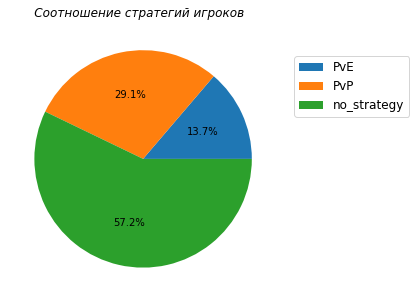

Информация о Количестве построенных зданий

Количество построенных зданий:  127956


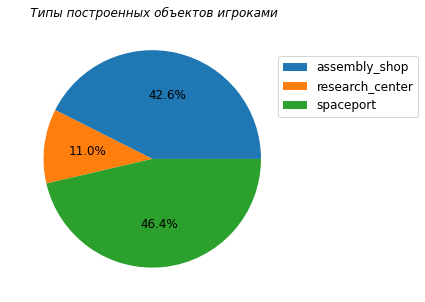

Количество построенных "assembly_shop":  54494 ,
 из них "PvE" игроки: 9116 ,
 из них "PvP" игроки: 16298
Количество построенных "research_center":  14137 ,
 из них "PvE" игроки: 3697 ,
 из них "PvP" игроки: 3755
Количество построенных "spaceport":  59325 ,
 из них "PvE" игроки: 10788 ,
 из них "PvP" игроки: 17132


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


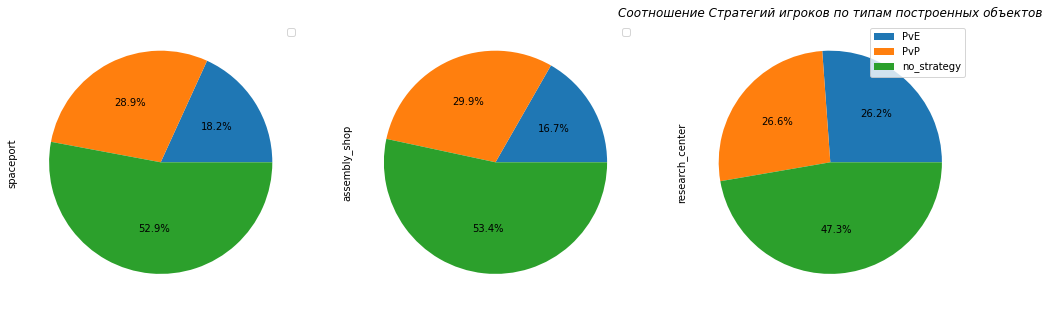

Среднее количество построенных зданий:  9.43
Среднее количество действий:  9.99

Информация о посещениях игры

Каждый день игру посещают 2884 пользователей(DAU)
Каждую неделю 6120 пользователей(WAY)
47.14 процентов игроков возвращаются в игру(sticky_factor)


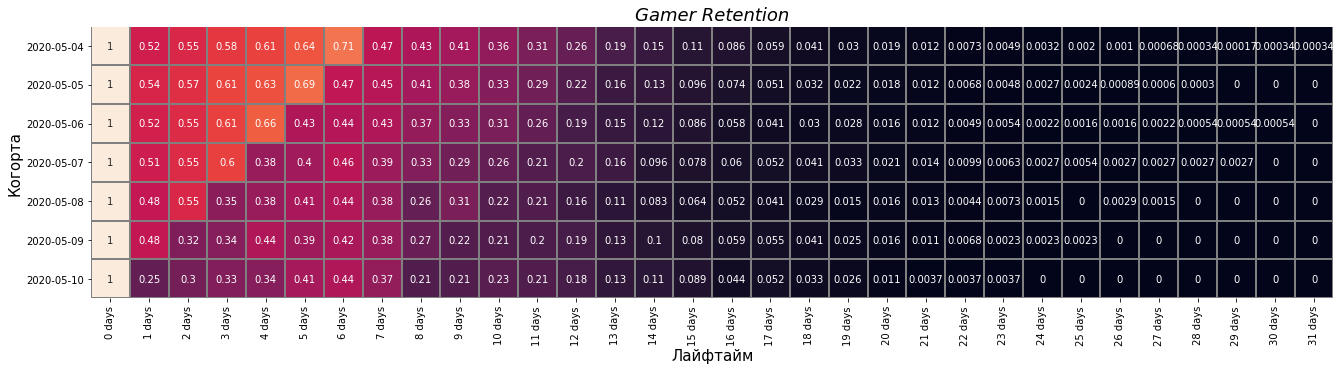

In [ ]:
get_retention(join, new_df)

Меньше половины игроков прошли 1й уровень нашей игры, а те, что прошли предпочитают больше сразиться с соперником, чем осуществить проект, подозреваю, что это быстрее. Больше всего строят здания типа `spaceport`, видимо освоение космоса все-таки стоит во главе задач наших игроков. В среднем игрок строит 9,43 здания. Больше 50% всех построенных зданий создали игроки не закончивших 1й уровень, кроме *research_center*, 52% процента этого типа зданий построено игроками завершившими 1й уровень.  

47% игроков возвращаются к нам в игру, это очень не плохо.  
На `heatmap`е мы видим когорты, разбитые по дню привлечения пользователя и их возврат в игру относительно первого дня лайфтайма. Тут мы можем заметить, что привлеченные первыми пользователи удерживаются намного лучше. При том на 1 день лайфтайма мы видим незначительный спад, а на 3-5 некоторые игроки вспоминают о игре снова.  
  
  Рассмотрим подробнее каждый канал привлечения и посмотрим чем игроки из них отличаются.

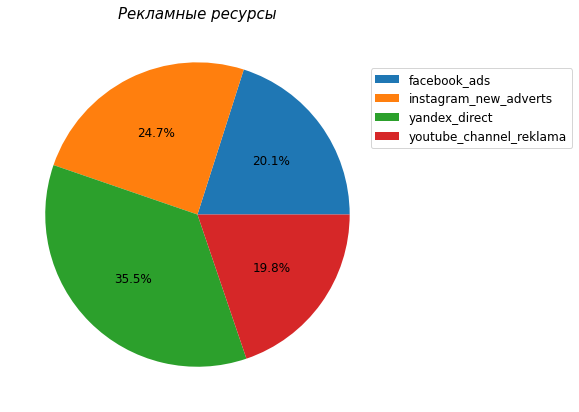

In [ ]:
source = new_df.groupby('source').agg({'user_id':'count'}).reset_index().rename(columns={'user_id':'count'})

plt.figure(figsize=(7,7))
plt.pie(source['count'], autopct='%.1f%%', textprops={'fontsize': 12})
#plt.axis()
plt.title('Рекламные ресурсы',
                fontstyle = 'oblique',
                fontsize = 15)
plt.legend(labels=source['source'], bbox_to_anchor=(1.5, 0.9), prop={'size': 12})
plt.show()

Как мы уже говорили, рекламных каналов у нас 4. Больше всего игроков к нам пришли из *yandex_direct* - 35.5%.
<br>
<br>Создадим таблицы с информацией по отдельным ресурсам привлечения игроков. 

In [ ]:
source_facebook = join.query('source_x == "facebook_ads"').reset_index()
new_df_facebook = new_df.query('source == "facebook_ads"').reset_index()

source_inst = join.query('source_x == "instagram_new_adverts"').reset_index()
new_df_inst = new_df.query('source == "instagram_new_adverts"').reset_index()

source_yandex = join.query('source_x == "yandex_direct"').reset_index()
new_df_yandex = new_df.query('source == "yandex_direct"').reset_index()

source_youtube = join.query('source_x == "youtube_channel_reklama"').reset_index()
new_df_youtube = new_df.query('source == "youtube_channel_reklama"').reset_index()


Пойдем в алфавитном порядке и первым выведем информацию о *facebook_ads*

Информация о Количестве игроков

Количество уникальных игроков:  2726
Количество игроков завершивших 1й уровень:  1150 , это около 42.2 % от общего количества игроков
Количество PvE игроков:  391
Количество PvP игроков:  759



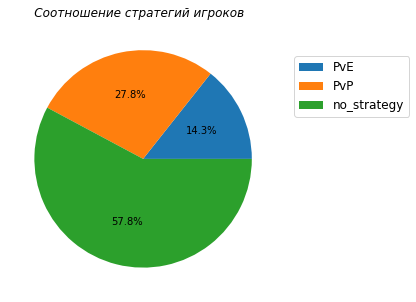

Информация о Количестве построенных зданий

Количество построенных зданий:  26131


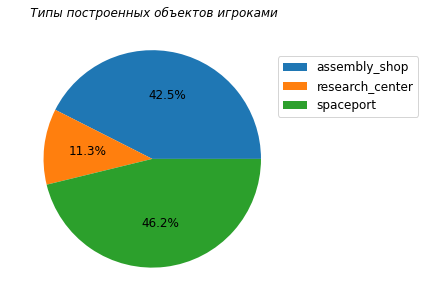

Количество построенных "assembly_shop":  11117 ,
 из них "PvE" игроки: 1918 ,
 из них "PvP" игроки: 3172
Количество построенных "research_center":  2945 ,
 из них "PvE" игроки: 786 ,
 из них "PvP" игроки: 747
Количество построенных "spaceport":  12069 ,
 из них "PvE" игроки: 2242 ,
 из них "PvP" игроки: 3238


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


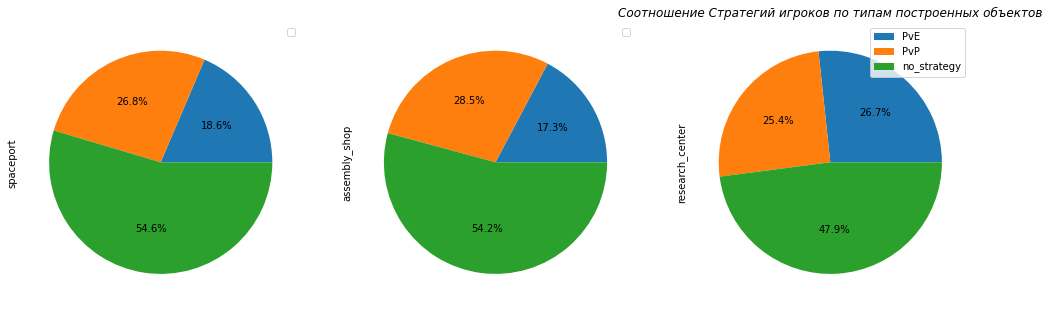

Среднее количество построенных зданий:  9.59
Среднее количество действий:  10.15

Информация о посещениях игры

Каждый день игру посещают 585 пользователей(DAU)
Каждую неделю 1233 пользователей(WAY)
47.48 процентов игроков возвращаются в игру(sticky_factor)


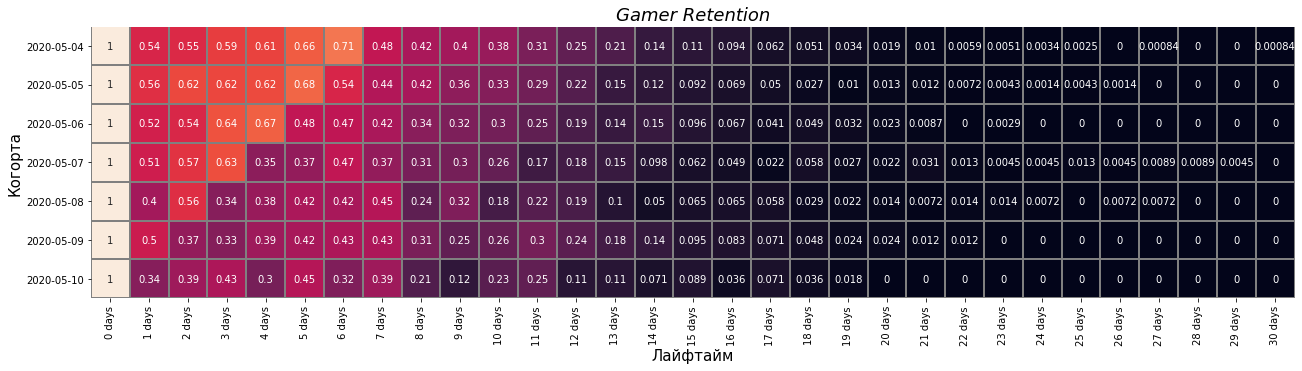

In [ ]:
get_retention(source_facebook, new_df_facebook)

42% привлеченных через *facebook* пользователей прошли 1й уровень. Количество *PvP*-игроков из них преобладает. Самой популярной постройкой является *spaceport*, на втором месте *assembly_shop*, а вот *research_center* прилично отстает, но тут выделились *PvE* и построили *research_center* ов больше чем *PVP*.  

47,5% Игроков возвращаются к нам, это чуть больше по сравлению со всеми пользователями.   
По `heatmap`у видно, что чем позже был привлечен игрок, тем неохотнее они заходят в игру в последующие периоды и  уже на 20й день мы несем полные потери в когорте *2020-05-10*.  
  
  Приступим к анализу игроков из *instagram_new_adverts*

Информация о Количестве игроков

Количество уникальных игроков:  3347
Количество игроков завершивших 1й уровень:  1466 , это около 43.8 % от общего количества игроков
Количество PvE игроков:  476
Количество PvP игроков:  990



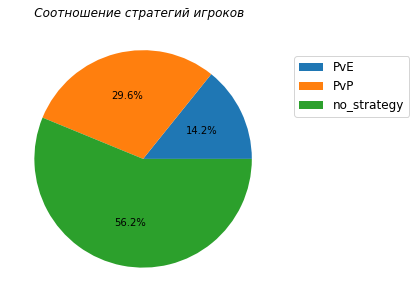

Информация о Количестве построенных зданий

Количество построенных зданий:  31815


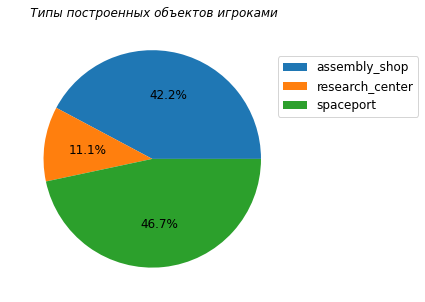

Количество построенных "assembly_shop":  13431 ,
 из них "PvE" игроки: 2340 ,
 из них "PvP" игроки: 4030
Количество построенных "research_center":  3537 ,
 из них "PvE" игроки: 948 ,
 из них "PvP" игроки: 929
Количество построенных "spaceport":  14847 ,
 из них "PvE" игроки: 2784 ,
 из них "PvP" игроки: 4347


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


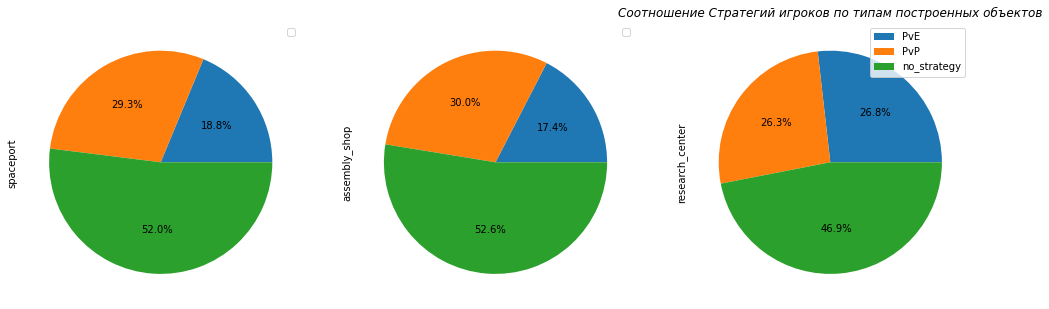

Среднее количество построенных зданий:  9.51
Среднее количество действий:  10.09

Информация о посещениях игры

Каждый день игру посещают 716 пользователей(DAU)
Каждую неделю 1520 пользователей(WAY)
47.14 процентов игроков возвращаются в игру(sticky_factor)


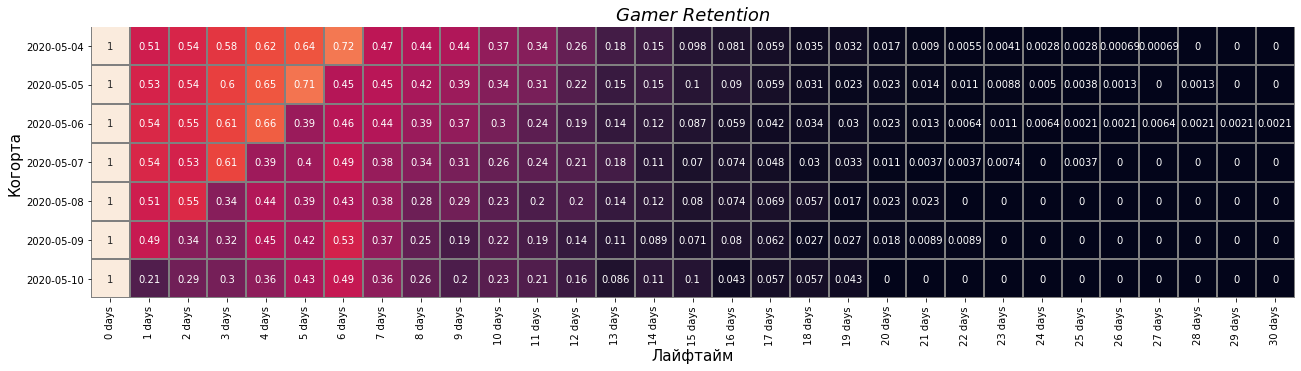

In [ ]:
get_retention(source_inst,new_df_inst)

43,8% пользователей из инстаграма прошли первый уровень, это немного больше чем у фейсбука, и чем в целом по палате, т.е. игре. *PvP*-игроков так же больше, порядок популярности построек не отличается от фейсбука.  
  
  47% игроков возвращаются в игру. По `heatmap`у похоже на фейсбук.  
  
  Далее рассмотрим *yandex_direct*

Информация о Количестве игроков

Количество уникальных игроков:  4817
Количество игроков завершивших 1й уровень:  2042 , это около 42.4 % от общего количества игроков
Количество PvE игроков:  620
Количество PvP игроков:  1422



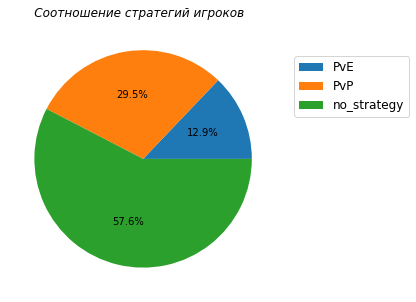

Информация о Количестве построенных зданий

Количество построенных зданий:  45032


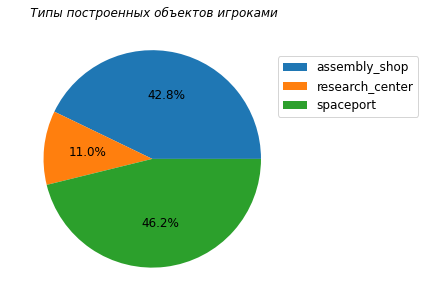

Количество построенных "assembly_shop":  19295 ,
 из них "PvE" игроки: 3034 ,
 из них "PvP" игроки: 5881
Количество построенных "research_center":  4952 ,
 из них "PvE" игроки: 1224 ,
 из них "PvP" игроки: 1334
Количество построенных "spaceport":  20785 ,
 из них "PvE" игроки: 3551 ,
 из них "PvP" игроки: 6117


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


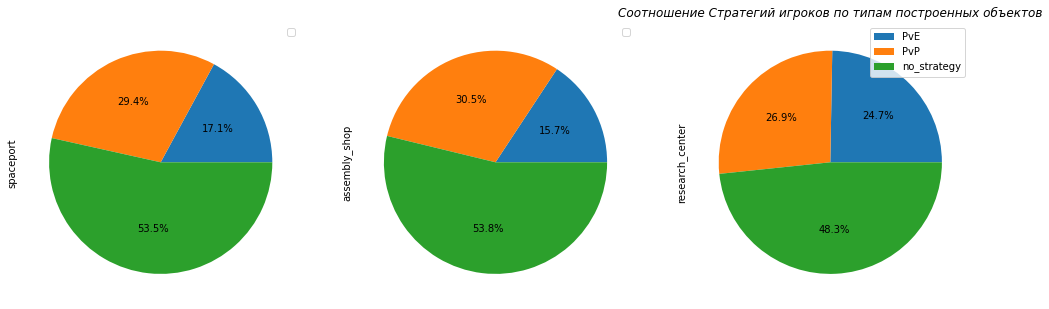

Среднее количество построенных зданий:  9.35
Среднее количество действий:  9.9

Информация о посещениях игры

Каждый день игру посещают 1018 пользователей(DAU)
Каждую неделю 2161 пользователей(WAY)
47.14 процентов игроков возвращаются в игру(sticky_factor)


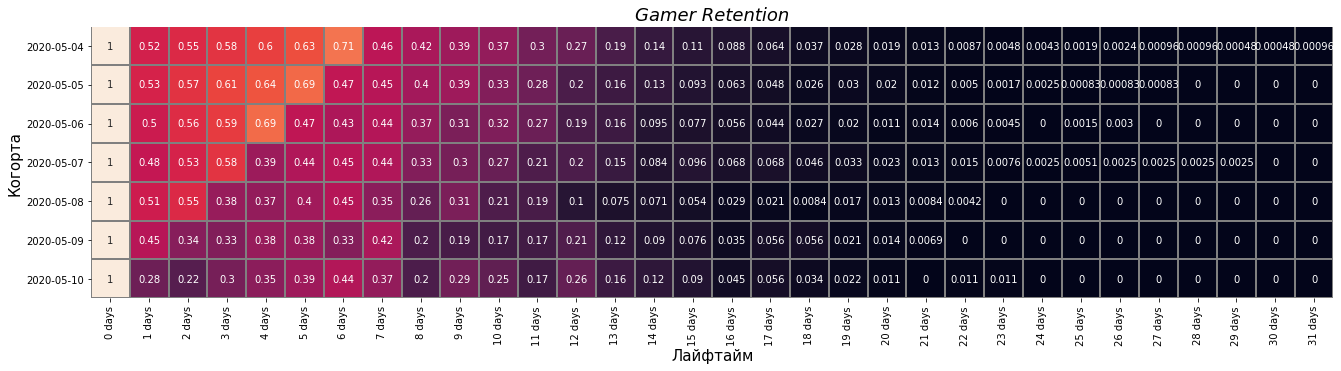

In [ ]:
get_retention(source_yandex,new_df_yandex)

Как мы уже говорили игроков из Яндекса больше всего 42,2% из них прошли первый уровень. Игроков со стратегией *PvP* больше, чем *PvE*. В постройках так же лидирует *spaceport*. А построек *research_center* тут уже больше у *PvP* игроков.  
  
  47% игроков, к нам возвращаются из этого канала. По `heatmap`у ситуация схожа с общей картиной, первые полные потери терпим 21 день в когорте *2020-05-10*.  
    
Приступим к последнему каналу привлечения *youtube_channel_reklama*

Информация о Количестве игроков

Количество уникальных игроков:  2686
Количество игроков завершивших 1й уровень:  1159 , это около 43.1 % от общего количества игроков
Количество PvE игроков:  379
Количество PvP игроков:  780



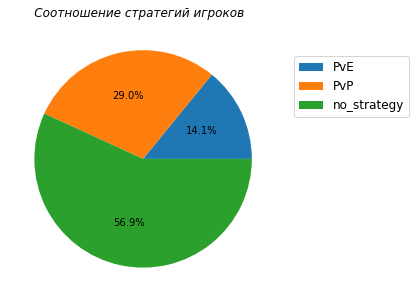

Информация о Количестве построенных зданий

Количество построенных зданий:  24978


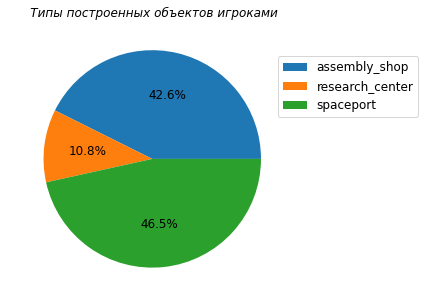

Количество построенных "assembly_shop":  10651 ,
 из них "PvE" игроки: 1824 ,
 из них "PvP" игроки: 3215
Количество построенных "research_center":  2703 ,
 из них "PvE" игроки: 739 ,
 из них "PvP" игроки: 745
Количество построенных "spaceport":  11624 ,
 из них "PvE" игроки: 2211 ,
 из них "PvP" игроки: 3430


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


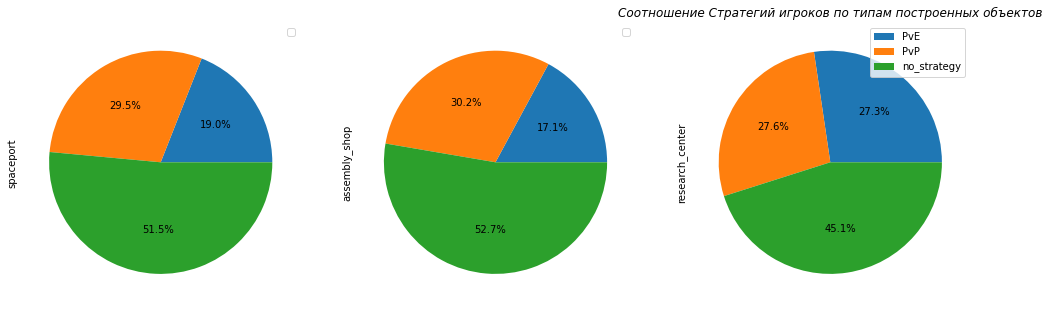

Среднее количество построенных зданий:  9.3
Среднее количество действий:  9.87

Информация о посещениях игры

Каждый день игру посещают 581 пользователей(DAU)
Каждую неделю 1205 пользователей(WAY)
48.25 процентов игроков возвращаются в игру(sticky_factor)


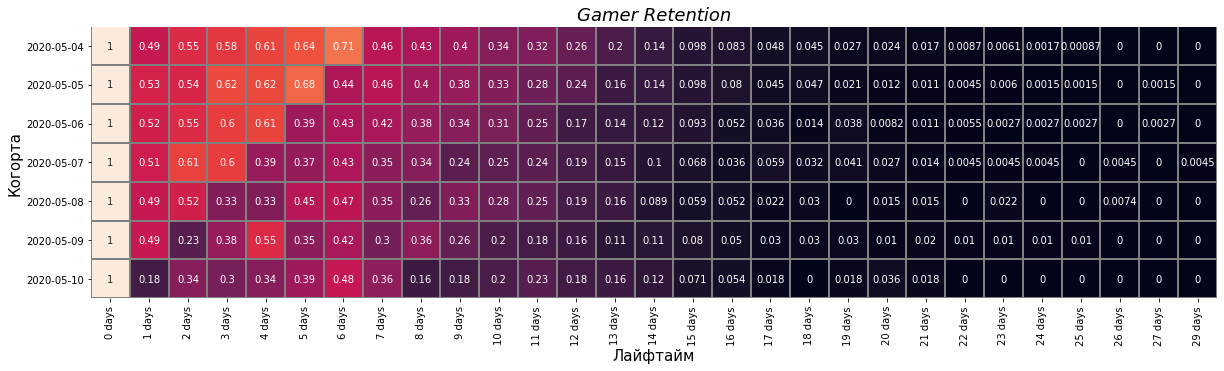

In [ ]:
get_retention(source_youtube,new_df_youtube)

Никаких явных отличий игроков пришедших из *youtube* нет.  
  
  43% игроков, пришедших из данного рекламного канала, прошли 1й уровень игры. *PvP*- игроки преобладают над *PvE*. Самым популярным объектом для постройки является *spaceport*.  
  
Более 48% пришедших из Ютюба игроков возвращаются в игру, это самый большой процент возвратов из всех имеющихся каналов.  
    
Однако, если смотреть на лайфтайм, то на 30 день мы теряем уже все когорты. Возвращаются много, но не на долго? 


#### Выводы

Никаких явных различий между игроками пришедших из различных рекламных каналов нет.  
  
 Большинство наших игроков не проходит 1го уровня. А те, кто проходит предпочитают сразиться с другим игроком, чем завершить проект. Самым популярным объектом для постройки является *spaceport*, на втором месте *assembly_shop*, на третьем *research_center*, при том по сравнению с предыдущими двумя объектами постройки *research_center* пользуется популярностью у *PvE* игроков на равне с *PvP* игроками. 

### Анализ затрат на рекламные кампании и возможные прибыли

Рассмотрим, сколько мы привлекли игроков по каждому источнику трафика.

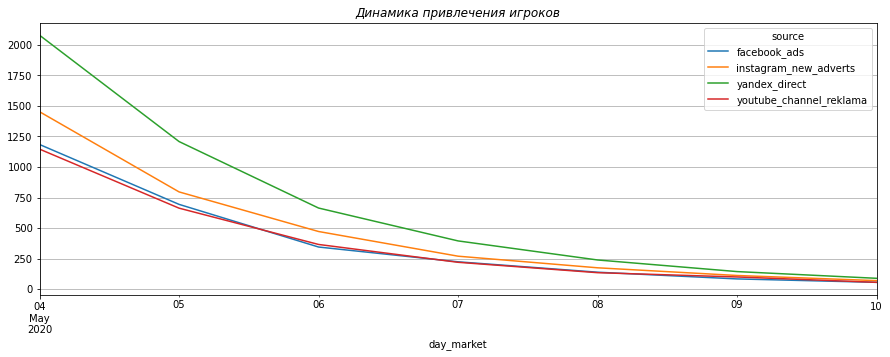

In [ ]:
users = new_df.pivot_table(
    index='day_market',  # даты первых посещений
    columns='source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
)

#динамику привлечения новых пользователей по каждому из рекламных каналов.
users.plot(figsize=(15, 5), grid=True)
plt.title('Динамика привлечения игроков',
                fontstyle = 'oblique',
                fontsize = 12)
plt.show()

Самое большое количество игроков нам принес канал *yandex_direct* и держал эту позицию на всем протяжении рекламной кампании. К концу рекламной кампании все каналы, примерно, сравнялись.
<br><br> Рассмотрим изменение затрат на рекламную кампанию по каналам привлечения.

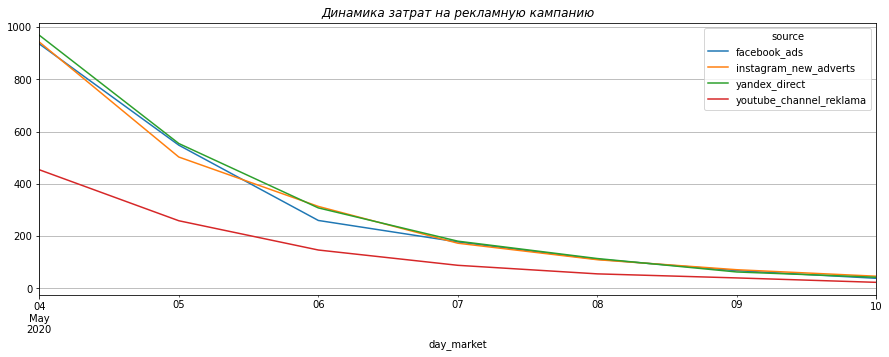

In [ ]:
cost_clik = ad_costs.pivot_table(
    index='day_market',  # даты первых посещений
    columns='source',  # источники переходов
    values='cost',  # ID пользователей
    aggfunc='sum'  # подсчёт уникальных значений
)
cost_clik.plot(figsize=(15, 5), grid=True)
plt.title('Динамика затрат на рекламную кампанию',
                fontstyle = 'oblique',
                fontsize = 12)
plt.show()

Первым бросается в глаза, что наименьшие затраты, за всю рекламную кампанию, мы понесли использую канал *youtube_channel_reklama*. Наибольшие затраты пришлись на *yandex_direct*, однако *yandex_direct* со второго дня рекламной кампании пересекается с *facebook_ads*, а с третьего дня пересекается с *instagram_new_adverts*. С четвертого дня рекламной кампании все три рекламных канала идут вровень по понесенным затратам. 
<br><br> Монетизации в игре еще нет (но очень хочется), и предполагается, что первым действием от которого мы будем получать доход - это показ рекламы. Рекламу планируем показывать перед постройкой здания. Как мы уже знаем, имеющиеся в анализе  13576 игроков уже построили 127 956 зданий. Выведем в табличный вид количество построенных зданий в зависимости от канала и дня привлечения игрока.

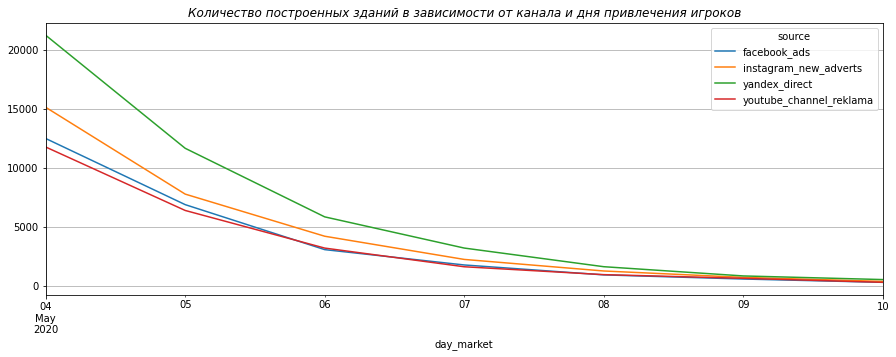

In [ ]:
bilds = new_df.pivot_table(
    index='day_market',  # даты первых посещений
    columns='source',  # источники переходов
    values='building',  # ID пользователей
    aggfunc='sum'  # подсчёт уникальных значений
)
bilds.plot(figsize=(15, 5), grid=True)
plt.title('Количество построенных зданий в зависимости от канала и дня привлечения игроков',
                fontstyle = 'oblique',
                fontsize = 12)
plt.show()

Больше всего построек приходится на канал *yandex_direct*, на втором месте *instagram_new_adverts*. С третьего дня рекламной кампании количество построек  *facebook_ads* и *youtube_channel_reklama* сравнивается. А за последние два дня все четыре рекламных канала выходят на один уровень.
    <br><br> Так как мы планируем монетизироваться, а монетизация будет связана с постройкой объектов в игре, нам важно количество построенных объектов. Предположим, что за каждый просмотренный рекламный ролик перед построением объекта мы уже получали около 0,0033 той же валюты, в которой покупали рекламу и посчитаем *LTV*.

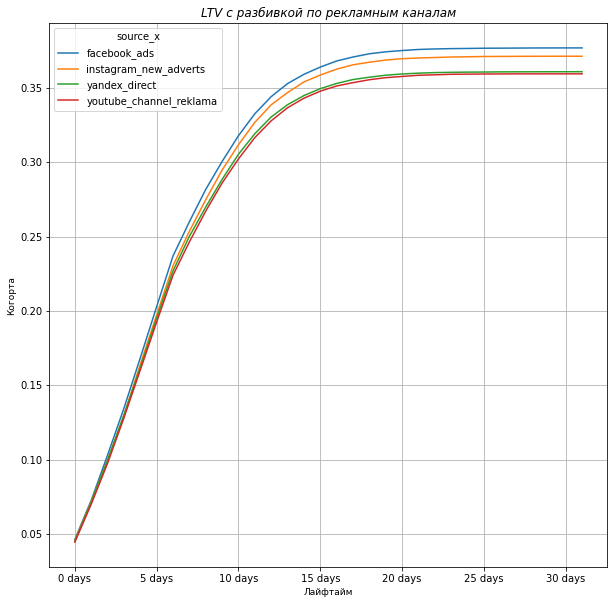

In [ ]:
result = join.pivot_table(
            index='source_x',
            columns='event_lifetime',
            values='building',
            aggfunc='sum',
)
#Разделим значение таблицы на 300, т.к. будем считать что один просмотр рекламы стоит 0,0033
result= result/300
#print(result)
# считаем сумму выручки с накоплением
result = result.fillna(0).cumsum(axis=1)
# вычисляем размеры когорт
cohort_sizes = (
                join.groupby('source_x')
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
                    )
# объединяем размеры когорт и таблицу выручки
result = cohort_sizes.merge(result, on='source_x', how='left').fillna(0)
        # считаем LTV:
        # делим каждую «ячейку» в строке на размер когорты
result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
    # восстанавливаем размеры когорт
result['cohort_size'] = cohort_sizes
result
    
result.columns = result.columns.astype(str)
result.columns = result.columns.str.replace(' 00:00:00', '')
    # исключаем размеры когорт
report = result.drop(columns = ['cohort_size'])
report.T.plot(figsize=(10, 10), grid=True)
plt.title('LTV с разбивкой по рекламным каналам',
                fontstyle = 'oblique',
                fontsize = 12)
plt.xlabel('Лайфтайм', size=9)
plt.ylabel('Когорта', size=9)
plt.show()
  

Судя по графику, больше всего нам бы принесли игроки из *facebook*, а меньше всего из *youtube*
<br><br>
Посчитаем *CAC* или стоимость привлечения одного клиента.

In [ ]:
#расчитываем cac
cac = cost_clik/users
cac = cac.mean()
cac = cac.to_frame()
cac.columns = [ 'cac']
cac

,cac
source,
facebook_ads,0.78
instagram_new_adverts,0.65
yandex_direct,0.46
youtube_channel_reklama,0.40


Самые дорогие игроки у нас из *facebook*, а самые дешевые, но не менее любимые, из канала *youtube_channel_reclama*.<br><br>Теперь мы сможем посчитать *ROI* И посмотреть окупаемость или хотя бы те каналы, которые к этому стремятся. Посчитаем и выведем график *ROI* с разбивкой по рекламным каналам

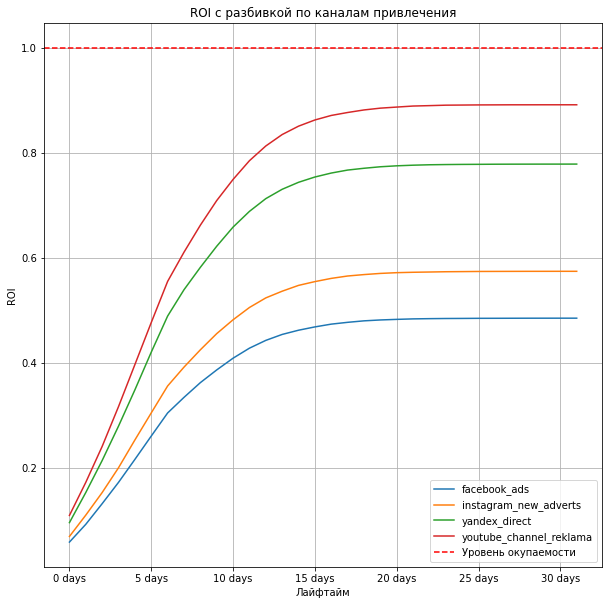

In [ ]:
roi = result.div(cac['cac'], axis=0)
report = roi.drop(columns=['cohort_size'])
report.T.plot(figsize=(10, 10), grid=True)

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Итак, с ценой просмотра рекламы в 0,0033 порог окупаемости ни один канал не перешагнули, хотя *youtube*, да и *yandex* старались. К сожалению, цифра 0,0033 не точная, для более точного прогноза нужно иметь актуальную информацию о ценах.

#### Вывод

Из проведенного анализа можно сделать следующие выводы:
 - *youtube* является самым привлекательным рекламным каналом, самая низкая цена - 0,40 за пользователя и приличное количество возможных прибылей, однако, *youtube* принес нам всего 19,8% игроков.
 - *yandex*, принес больше всех игроков - 35,5%, при том это на 10% больше чем у *intagram*(второе место по количеству привлеченных пользователей). Цена за одного пользователя немного выше чем у *youtube* - 0,46.
 - *intagram* - цена пользователя выше средней цены - 0,65 за одного. 24,7% игроков пришли из этого канала, но к окупаемости не стремится.
 - *facebook* - самые дорогостоящие пользователи здесь. Один обошелся нам в 0,78. Но и построили объектов они прилично, хотя в итоге цена-качество все же на последнем месте.
 
 

## Проверка гипотез

### Среднее время завершение уровня одинаково вне зависимости от способа прохождения.

Сформулируем гипотезы о равенстве средних показателей времени завершения первого уровня вне зависимости от способа прохождения.  
  
Нулевая гипотеза H₀ всегда формулируется так, чтобы использовать знак равенства, *H₀* будет звучать так:

 - Среднее время завершения первого уровня между *PvP*-игроками и *PvE*-игроками равно.   
  
*H₁* будет звучать:
 - Среднее время завершения первого уровня между *PvP*-игроками и *PvE*-игроками  НЕ равно.
Зададим критический уровень статистической значимости в 0,05, а так как количество пользователей тарифов различается, применим параметр `equal_var = False`.

In [ ]:
#Перевод продолжительности прохождения уровня в число
join['event_lifetime_int'] =  join['event_lifetime'].dt.days

#создание таблиц для проверки гипотез
PvP=join.query('gamer == "PvP" and event == "finished_stage_1" ')['event_lifetime_int']
PvE=join.query('gamer == "PvE" and event == "finished_stage_1"')['event_lifetime_int']

In [ ]:
#
alpha = .05 #критический уровень статистической значимости
results = st.ttest_ind(
    PvP, 
    PvE,equal_var = False)#проверяем гипотезу о равенстве средних двух совокупностей
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.5704667556440105e-105
Отвергаем нулевую гипотезу


Итак, мы отвергаем нулевую теорию, выведем средние значения выручки по тарифам и сравним их визуально.

In [ ]:
(join.query('event == "finished_stage_1"')
    .pivot_table(index='gamer', values='event_lifetime_int', 
                    aggfunc=[np.mean, np.median, np.var, np.std]))


,mean,median,var,std
,event_lifetime_int,event_lifetime_int,event_lifetime_int,event_lifetime_int
gamer,,,,
PvE,13.40,13,12.41,3.52
PvP,11.06,11,16.85,4.10


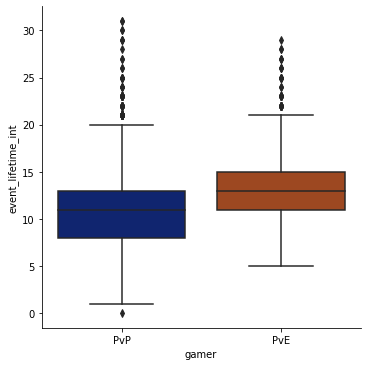

In [ ]:
sns.catplot(x='gamer', y = 'event_lifetime_int', kind="box", data=join.query('event == "finished_stage_1"'), palette ='dark')
plt.show()

Мы видим, что средние и медианные значения примерно одинаковы, что говорит нам о совсем не значительных выбросах. Но вот разница между *PvP* и *PvE* игроками наблюдается заметная, особенно это видно на  "ящике с усами":  медиана *PvE*-игроков находится на одном уровне с 75-м перцентилем *PvP*-игроков, что означает, что прохождение первого уровня *PvP*- игрокам дается значительно быстрее. 

### Количество построенных объектов в среднем одинаково у всех игроков, вне зависимости от способа прохождения первого уровня

Сформулируем гипотезы о равенстве среднего количества построенных объектов у игроков, вне зависимости от способа прохождения игры.  
  
*H₀*:
 - Среднее количество построенных объектов между *PvP*-игроками и *PvE*-игроками равно.  
  
  
*H₁* будет звучать:
 - Среднее количество построенных объектов между *PvP*-игроками и *PvE*-игроками  НЕ равно.  
  
 Зададим критический уровень статистической значимости в 0,05, и выполним тест U-критерия Манна-Уитни используемый для сравнения двух независимых выборок по уровню какого-либо признака, измеренного количественно.

In [ ]:
new_df
PvP=new_df.query('gamer == "PvP"')['building']
PvE=new_df.query('gamer == "PvE"')['building']

In [ ]:
alpha = .05 #критический уровень статистической значимости
results = st.mannwhitneyu(PvP, PvE) #проверяем гипотезу о равенстве средних двух совокупностей
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.211926275022306e-305
Отвергаем нулевую гипотезу


Значит, что все-таки есть значительная разница между средним количеством построенных объектов между игроками с разными стратегиями игры.  
  
Посмотрим эту разницу визуально.

In [ ]:
(new_df.query('gamer != "no_strategy"')
    .pivot_table(index='gamer', values='building', 
                    aggfunc=[np.mean, np.median, np.var, np.std]))


,mean,median,var,std
,building,building,building,building
gamer,,,,
PvE,12.65,12,4.68,2.16
PvP,9.41,10,9.36,3.06


*PvE*- игроки строят в среднем больше, чем *PvP*. У обоих групп средние и медианы примерно одинаковы.
<br>Рассмотрим "ящики с усами":

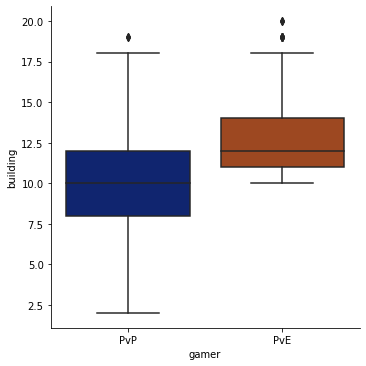

In [ ]:
sns.catplot(x='gamer', y = 'building', kind="box", data=new_df.query('gamer != "no_strategy"'), palette ='dark')
plt.show()

По графику видно, что выбросов мало. Медианы значительно различаются и медиана *PvE*-игроков расположена на вершине коробки *PvP*-игроков, т.е. на 75-м перцентиле.

## Выводы

 1) Предоставленные данные вполне чистые и читаемые, особых правок не понадобилось.  
   
   

 2) Мы узнали что:  

количество игроков - 13 576,   
всего они совершили - 135 639 событий,  
всего 42.8% игроков завершили 1й уровень, из них 1 866  *PvE*-игроки и 3 951 *PvP*-игроки  
количество построенных зданий 127 956  
  

3) Особой разницы в поведении игроков привлеченных из разных каналов замечено не было. Больше 50% игроков не придерживаются никакой стратегии и просто строят объекты. Самый популярный объект это - Космопорт.  
  
4) Анализ затрат показал, что самыми многообещающими рекламными каналами являются *yandex* и *youtube*. У первого хорошая цена и хороший поток пользователей. У второго цена еще лучше, но приток игроков наименьший.  
  
5) Среднее время прохождения уровня отличается у игроков с разной стратегией на *два дня*. Это значит, что игроки, которые решили пройти уровень посредством реализации проекта тратят на это очень много времени.  
  
6) Среднее количество построенных объектов у *PvE*-игроками и *PvP*-игроками различаются. *PvE*-игроки строят больше объектов.

**Рекомендации:**   
1) Игроков с *PvP* стратегией больше, возможно  из-за того, что пройти уровень посредством выигрыша у соперника быстрее. Однако, так как мы собираемся монетизироваться посредством показа рекламы перед постройкой объекта, а объектов у нас больше создают *PvE*-игроки, стоит подумать об ускорении прохождения первого уровня. Считаю, что первый уровень должен быть легким и зазывающим игрока продолжать играть и развиваться, а у нас игроки тратят в среднем 11-13 дней на это.  

2) Возможно добавить в игру больше действий, которые могут заинтересовать игроков, добавить мини-игры, соревнования и рейтинги среди игроков. Повышение соревновательного духа может помочь с удержанием игроков.   
  
3) При рассмотрении рекламных кампаний были выявлены два более перспективных канала привлечения: *yandex* и *youtube*. Рекомендую обратить на них более пристальное внимание и уделить на них большее количество рекламного бюджета.